In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Hello, my name is Dhanraj. This is an assessment for Zepto. 

Reference notes:
https://football-data.co.uk/notes.txt

In [2]:
df = pd.read_csv("../zepto/E0.csv")
pd.set_option('display.max_columns', None)
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,8,22,3,4,12,8,2,5,0,0,0,0,4.00,3.40,1.95,4.00,3.50,1.95,3.80,3.40,2.05,4.05,3.46,2.05,4.00,3.40,1.90,4.10,3.40,2.00,4.62,3.72,2.10,4.02,3.43,2.02,2.10,1.72,2.22,1.73,2.26,1.83,2.16,1.73,0.50,1.86,2.07,1.88,2.06,2.05,2.08,1.87,2.03,3.80,3.25,2.05,3.80,3.3,2.05,3.80,3.25,2.10,3.94,3.33,2.13,3.90,3.00,2.05,3.90,3.25,2.10,4.20,3.50,2.18,3.89,3.28,2.10,2.37,1.57,2.44,1.62,2.47,1.75,2.33,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,H,P Tierney,16,10,8,3,11,9,5,4,1,2,0,0,1.53,4.50,5.75,1.53,4.50,5.75,1.55,4.40,5.75,1.56,4.57,5.96,1.52,4.33,5.80,1.55,4.40,6.00,1.59,4.65,6.35,1.55,4.48,5.87,1.61,2.30,1.67,2.32,1.71,2.38,1.65,2.29,-1.00,1.95,1.98,1.96,1.96,2.00,2.01,1.93,1.96,1.61,4.20,5.25,1.62,4.1,5.25,1.65,4.20,4.90,1.67,4.20,5.40,1.57,4.20,5.50,1.65,4.10,5.25,1.71,4.33,5.80,1.64,4.19,5.22,1.66,2.20,1.70,2.27,1.75,2.37,1.67,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,H,D Coote,14,14,3,8,10,7,7,6,2,1,0,0,3.10,3.10,2.45,3.20,3.10,2.40,3.15,3.05,2.45,3.30,3.12,2.51,3.20,3.00,2.45,3.13,3.10,2.45,3.33,3.20,2.60,3.19,3.09,2.49,2.50,1.53,2.56,1.56,2.56,1.63,2.46,1.57,0.25,1.80,2.14,1.83,2.12,1.83,2.17,1.79,2.12,3.10,3.10,2.45,3.25,3.1,2.40,3.10,3.05,2.45,3.27,3.14,2.51,3.10,3.00,2.45,3.13,3.13,2.50,3.35,3.20,2.56,3.19,3.10,2.48,2.30,1.61,2.33,1.67,2.42,1.71,2.34,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,13,4,6,1,15,11,5,2,0,0,0,0,1.25,5.75,13.00,1.28,5.75,10.50,1.25,6.00,13.00,1.26,6.24,12.74,1.25,5.50,13.00,1.25,5.75,13.00,1.30,6.30,15.00,1.26,5.92,12.80,1.80,2.00,1.80,2.09,1.84,2.12,1.79,2.06,-1.50,1.84,2.09,1.79,2.12,1.93,2.12,1.83,2.07,1.30,5.25,11.00,1.33,5.0,10.00,1.30,5.25,11.00,1.34,5.40,11.00,1.30,5.25,10.00,1.33,5.00,11.00,1.36,5.50,11.50,1.33,5.17,10.58,1.90,1.90,1.93,1.98,1.96,2.07,1.90,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,A,A Madley,14,6,6,3,13,15,6,8,2,0,0,0,1.90,3.50,4.00,1.95,3.50,3.90,1.95,3.45,3.95,2.01,3.56,4.10,1.95,3.40,4.00,1.95,3.40,4.10,2.04,3.66,4.25,1.97,3.53,4.04,2.00,1.80,2.14,1.78,2.14,1.85,2.07,1.79,-0.50,2.00,1.93,2.01,1.92,2.01,1.97,1.96,1.92,2.00,3.40,3.90,2.05,3.4,3.75,2.00,3.35,4.00,2.05,3.45,4.07,1.95,3.40,3.90,2.00,3.30,4.20,2.12,3.50,4.20,2.04,3.39,3.95,2.20,1.66,2.28,1.69,2.34,1.77,2.24,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86


Firstly, let us label away team wins as 1, else 0 for target data column. We will also remove columns that occured during game (example- goals scored). I am also removing some columns like teams names, referee, date and time. This is because- 

1. There are 20 premier league teams for a dataset of 300 rows, so the dataset is too small to analyze large categorical variables. 
2. date, time, referee name etc should not affect the outcome of the game for the most part.
3. Even if this information does affect the outcome, then the betting odds should have priced in this information. 

In [3]:
#create target set for Full time result
df_target = df.loc[:, ['FTR']]
#replaces home, away and draw result as 0, 1 and 0
df_target.replace(['H', 'A', 'D'], [0, 1, 0], inplace=True)

#removing unwanted columns 
df_features = df.drop(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTR', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 
             'HS','AS','HST','AST','HF','AF','HC','AC', 'HY', 'AY', 'HR', 'AR'], axis=1)
df_features.head()

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,4.00,3.40,1.95,4.00,3.50,1.95,3.80,3.40,2.05,4.05,3.46,2.05,4.00,3.40,1.90,4.10,3.40,2.00,4.62,3.72,2.10,4.02,3.43,2.02,2.10,1.72,2.22,1.73,2.26,1.83,2.16,1.73,0.50,1.86,2.07,1.88,2.06,2.05,2.08,1.87,2.03,3.80,3.25,2.05,3.80,3.3,2.05,3.80,3.25,2.10,3.94,3.33,2.13,3.90,3.00,2.05,3.90,3.25,2.10,4.20,3.50,2.18,3.89,3.28,2.10,2.37,1.57,2.44,1.62,2.47,1.75,2.33,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,1.53,4.50,5.75,1.53,4.50,5.75,1.55,4.40,5.75,1.56,4.57,5.96,1.52,4.33,5.80,1.55,4.40,6.00,1.59,4.65,6.35,1.55,4.48,5.87,1.61,2.30,1.67,2.32,1.71,2.38,1.65,2.29,-1.00,1.95,1.98,1.96,1.96,2.00,2.01,1.93,1.96,1.61,4.20,5.25,1.62,4.1,5.25,1.65,4.20,4.90,1.67,4.20,5.40,1.57,4.20,5.50,1.65,4.10,5.25,1.71,4.33,5.80,1.64,4.19,5.22,1.66,2.20,1.70,2.27,1.75,2.37,1.67,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,3.10,3.10,2.45,3.20,3.10,2.40,3.15,3.05,2.45,3.30,3.12,2.51,3.20,3.00,2.45,3.13,3.10,2.45,3.33,3.20,2.60,3.19,3.09,2.49,2.50,1.53,2.56,1.56,2.56,1.63,2.46,1.57,0.25,1.80,2.14,1.83,2.12,1.83,2.17,1.79,2.12,3.10,3.10,2.45,3.25,3.1,2.40,3.10,3.05,2.45,3.27,3.14,2.51,3.10,3.00,2.45,3.13,3.13,2.50,3.35,3.20,2.56,3.19,3.10,2.48,2.30,1.61,2.33,1.67,2.42,1.71,2.34,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,1.25,5.75,13.00,1.28,5.75,10.50,1.25,6.00,13.00,1.26,6.24,12.74,1.25,5.50,13.00,1.25,5.75,13.00,1.30,6.30,15.00,1.26,5.92,12.80,1.80,2.00,1.80,2.09,1.84,2.12,1.79,2.06,-1.50,1.84,2.09,1.79,2.12,1.93,2.12,1.83,2.07,1.30,5.25,11.00,1.33,5.0,10.00,1.30,5.25,11.00,1.34,5.40,11.00,1.30,5.25,10.00,1.33,5.00,11.00,1.36,5.50,11.50,1.33,5.17,10.58,1.90,1.90,1.93,1.98,1.96,2.07,1.90,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,1.90,3.50,4.00,1.95,3.50,3.90,1.95,3.45,3.95,2.01,3.56,4.10,1.95,3.40,4.00,1.95,3.40,4.10,2.04,3.66,4.25,1.97,3.53,4.04,2.00,1.80,2.14,1.78,2.14,1.85,2.07,1.79,-0.50,2.00,1.93,2.01,1.92,2.01,1.97,1.96,1.92,2.00,3.40,3.90,2.05,3.4,3.75,2.00,3.35,4.00,2.05,3.45,4.07,1.95,3.40,3.90,2.00,3.30,4.20,2.12,3.50,4.20,2.04,3.39,3.95,2.20,1.66,2.28,1.69,2.34,1.77,2.24,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86


Let us split the dataset into train and test set (80-20 split). We are doing a relatively smaller test set to maximize our training data due to the size of our dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, random_state=0, test_size=0.2)

Firstly, I want to understand what the features mean. Based on looking at the features, I suspect that a large amount of collinear features exist in our dataset and that might affect our classifier. I have decided that I am going to separate the features into buckets and look at each section individually. Initially, let us start with just the opening betting odds (first 24 columns)

In [5]:
df_bets = X_train.iloc[:,:24]
df_bets.head()

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
247,1.65,3.80,5.50,1.62,3.75,5.75,1.65,3.75,5.75,1.65,3.90,6.08,1.63,3.6,5.80,1.62,3.6,6.00,1.70,4.00,6.25,1.65,3.80,5.83
310,1.25,6.50,10.00,1.22,6.50,13.00,1.25,6.50,11.00,1.23,6.60,14.96,1.24,5.8,12.00,1.20,6.0,13.00,1.28,6.80,15.00,1.24,6.45,12.84
338,5.00,3.60,1.75,4.80,3.70,1.72,4.70,3.70,1.77,4.98,3.77,1.79,4.75,3.6,1.75,4.60,3.6,1.75,5.21,3.88,1.82,4.83,3.71,1.77
142,8.00,4.75,1.40,7.25,4.75,1.42,7.00,4.80,1.43,8.08,4.72,1.45,7.50,4.5,1.42,7.50,4.5,1.40,8.33,5.19,1.47,7.73,4.75,1.43
21,1.95,3.60,3.80,1.95,3.70,3.80,2.00,3.50,3.75,2.02,3.63,3.95,2.00,3.4,3.70,1.95,3.5,4.00,2.06,3.74,4.00,2.00,3.57,3.84


Let us further separate df_bets into home and away odds 

In [6]:
home_odds = df_bets.loc[:, ['B365H', 'BWH', 'IWH', 'PSH', 'WHH', 'VCH', 'MaxH','AvgH']]
away_odds = df_bets.loc[:, ['B365A', 'BWA', 'IWA', 'PSA', 'WHA', 'VCA', 'MaxA','AvgA']]

In [7]:
away_odds

,B365A,BWA,IWA,PSA,WHA,VCA,MaxA,AvgA
247,5.50,5.75,5.75,6.08,5.80,6.00,6.25,5.83
310,10.00,13.00,11.00,14.96,12.00,13.00,15.00,12.84
338,1.75,1.72,1.77,1.79,1.75,1.75,1.82,1.77
142,1.40,1.42,1.43,1.45,1.42,1.40,1.47,1.43
21,3.80,3.80,3.75,3.95,3.70,4.00,4.00,3.84
...,...,...,...,...,...,...,...,...
323,26.00,23.00,22.00,27.79,23.00,26.00,32.00,25.83
192,10.00,10.50,9.50,10.04,11.00,10.50,11.33,10.28
117,6.50,6.00,6.00,6.84,6.50,6.50,7.16,6.38
47,2.75,2.65,2.70,2.77,2.70,2.63,2.85,2.73


now, let us look at the correlation for Home and Away win odds

In [8]:
home_corr = home_odds.corr()
away_corr = away_odds.corr()

#looking at home odds correlation matrix 
home_corr.style.background_gradient(cmap='coolwarm')

,B365H,BWH,IWH,PSH,WHH,VCH,MaxH,AvgH
B365H,1.000000,0.984968,0.992240,0.987954,0.991321,0.992734,0.986533,0.990868
BWH,0.984968,1.000000,0.983353,0.995895,0.987170,0.989450,0.992798,0.995738
IWH,0.992240,0.983353,1.000000,0.988419,0.996643,0.994744,0.990938,0.992743
PSH,0.987954,0.995895,0.988419,1.000000,0.992467,0.994389,0.995438,0.997907
WHH,0.991321,0.987170,0.996643,0.992467,1.000000,0.996527,0.993039,0.995373
VCH,0.992734,0.989450,0.994744,0.994389,0.996527,1.000000,0.996364,0.997629
MaxH,0.986533,0.992798,0.990938,0.995438,0.993039,0.996364,1.000000,0.998468
AvgH,0.990868,0.995738,0.992743,0.997907,0.995373,0.997629,0.998468,1.000000


In [9]:
#similiarly, looking at away odds and draw odds
away_corr.style.background_gradient(cmap='coolwarm')

,B365A,BWA,IWA,PSA,WHA,VCA,MaxA,AvgA
B365A,1.000000,0.982091,0.988407,0.990653,0.989796,0.985382,0.989738,0.993646
BWA,0.982091,1.000000,0.986953,0.992745,0.992224,0.990366,0.986479,0.991418
IWA,0.988407,0.986953,1.000000,0.993598,0.995199,0.996285,0.993487,0.996652
PSA,0.990653,0.992745,0.993598,1.000000,0.995042,0.993751,0.995809,0.998134
WHA,0.989796,0.992224,0.995199,0.995042,1.000000,0.995579,0.994780,0.997269
VCA,0.985382,0.990366,0.996285,0.993751,0.995579,1.000000,0.994701,0.996801
MaxA,0.989738,0.986479,0.993487,0.995809,0.994780,0.994701,1.000000,0.997760
AvgA,0.993646,0.991418,0.996652,0.998134,0.997269,0.996801,0.997760,1.000000


There is a very high correlation between all the major betting websites for home and away odds (around 99%). So, let us drop all the columns except the average home and away odds (AvgH and AvgA). This will reduce our features and will adjust for the noise in the data. We did not select draw odds because if a draw is likely, then home and away odds should have accounted for that anyway.   

In [10]:
df_avg_odds = df_bets.loc[:, ['AvgH', 'AvgA']]
df_avg_odds.head()

,AvgH,AvgA
247,1.65,5.83
310,1.24,12.84
338,4.83,1.77
142,7.73,1.43
21,2.00,3.84


We don't need the 2.5x over/under odds, because the number of goals scored doesn't really predict which team will win. Let us make sure by ccomparing the over/under dataframe with home and away team win odds

In [11]:
df_over_under = X_train.iloc[:,24:32]
df_over_under

,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5
247,2.20,1.66,2.28,1.69,2.34,1.74,2.23,1.67
310,1.50,2.62,1.52,2.62,1.58,2.66,1.51,2.57
338,2.02,1.88,2.03,1.88,2.04,1.90,1.98,1.85
142,1.66,2.20,1.72,2.23,1.75,2.31,1.70,2.21
21,1.90,1.90,2.01,1.90,2.05,1.95,1.97,1.88
...,...,...,...,...,...,...,...,...
323,1.36,3.20,1.40,3.11,1.43,3.20,1.38,3.03
192,1.66,2.20,1.68,2.27,1.72,2.31,1.66,2.24
117,1.50,2.62,1.48,2.79,1.52,2.79,1.49,2.64
47,2.10,1.72,2.09,1.83,2.26,1.83,2.17,1.71


In [12]:
#lets check the correlation against the odds of away team winning
df_over_under.corrwith(X_train['AvgA'])

B365>2.5   -0.452910
B365<2.5    0.621607
P>2.5      -0.441541
P<2.5       0.593669
Max>2.5    -0.450224
Max<2.5     0.600506
Avg>2.5    -0.449328
Avg<2.5     0.596714
dtype: float64

In [13]:
#lets check the correlation against the odds of home team winning
df_over_under.corrwith(X_train['AvgH'])

B365>2.5   -0.127229
B365<2.5    0.076296
P>2.5      -0.151399
P<2.5       0.126749
Max>2.5    -0.154650
Max<2.5     0.133936
Avg>2.5    -0.155495
Avg<2.5     0.138951
dtype: float64

Since there is no strong correlation, let us discard the 2.5 over/under odds and the 2.5 over/under closing odds.

Finally, let us look into the asian handicap odds

In [14]:
asian_handicap_df = X_train.iloc[:,32:41]
asian_handicap_df

,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA
247,-0.75,1.86,2.04,1.88,2.06,1.89,2.07,1.85,2.03
310,-1.75,1.93,1.97,1.93,1.97,1.97,1.99,1.91,1.96
338,0.75,1.87,2.03,1.89,2.03,1.90,2.06,1.87,2.00
142,1.25,1.94,1.96,1.95,1.97,1.97,2.01,1.93,1.96
21,-0.50,2.02,1.91,2.02,1.90,2.03,1.94,2.00,1.88
...,...,...,...,...,...,...,...,...,...
323,-2.50,1.98,1.92,2.00,1.91,2.02,1.93,1.99,1.89
192,-1.50,1.93,1.97,1.95,1.93,1.97,2.01,1.91,1.96
117,-1.25,2.04,1.86,2.04,1.88,2.11,1.90,2.04,1.85
47,0.00,1.95,1.98,1.97,1.95,1.98,2.00,1.94,1.95


From wikipedia, https://en.wikipedia.org/wiki/Asian_handicap 

"Most importantly, Asian handicap betting reduces the possible number of outcomes from three (in traditional 1X2 wagering) to two by eliminating the draw outcome.[2] This simplification delivers two betting options that each have a near 50% chance of success."

In [15]:
asian_handicap_df.describe(include='all')

,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,-0.236842,1.946526,1.958491,1.960246,1.962702,1.990035,1.997404,1.938035,1.944842
std,0.934026,0.090629,0.091140,0.092912,0.092714,0.090653,0.090951,0.086832,0.087063
min,-2.500000,1.730000,1.730000,1.760000,1.770000,1.820000,1.820000,1.780000,1.770000
25%,-0.750000,1.870000,1.880000,1.880000,1.880000,1.910000,1.920000,1.860000,1.870000
50%,-0.250000,1.950000,1.970000,1.950000,1.960000,1.990000,2.000000,1.930000,1.950000
75%,0.250000,2.020000,2.040000,2.040000,2.040000,2.070000,2.080000,2.010000,2.020000
max,2.250000,2.140000,2.140000,2.170000,2.190000,2.200000,2.190000,2.130000,2.120000


From this we can see that the asian handicap data has a mean of about 2.00 with the top 25-75 percentiles existing within the range of 1.87 and 2.02. This shows that every outcome has a 50% chance as described by the wikipedia article. Let us look at the closing odds.

In [16]:
asian_handicap_closing_df = X_train.iloc[:,73:]
asian_handicap_closing_df

,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
247,-0.75,1.87,2.03,1.90,2.03,1.93,2.06,1.87,2.00
310,-1.75,1.92,1.98,1.99,1.97,1.99,2.01,1.94,1.93
338,0.75,1.94,1.96,1.98,1.94,2.09,2.00,1.96,1.92
142,1.50,1.77,2.02,1.84,2.09,1.94,2.25,1.79,2.10
21,-0.50,2.09,1.84,2.10,1.84,2.14,1.86,2.08,1.81
...,...,...,...,...,...,...,...,...,...
323,-2.50,1.97,1.93,1.95,1.95,2.00,2.06,1.96,1.91
192,-1.25,1.91,1.99,1.86,2.06,1.99,2.10,1.91,1.97
117,-1.00,1.89,2.01,1.89,2.04,1.92,2.18,1.85,2.04
47,-0.25,2.14,1.80,2.17,1.79,2.20,1.82,2.15,1.77


In [17]:
asian_handicap_closing_df.describe(include='all')

,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,285.000000,284.000000,284.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,-0.224561,1.929754,1.969577,1.949333,1.978702,2.017474,2.056491,1.923439,1.962175
std,0.941751,0.103839,0.099560,0.106298,0.107798,0.116047,0.111720,0.093044,0.094810
min,-2.500000,1.650000,1.700000,1.660000,1.720000,1.810000,1.820000,1.700000,1.750000
25%,-0.750000,1.857500,1.900000,1.870000,1.910000,1.930000,1.970000,1.850000,1.890000
50%,-0.250000,1.940000,1.975000,1.950000,1.970000,2.010000,2.050000,1.920000,1.960000
75%,0.250000,2.010000,2.050000,2.010000,2.060000,2.100000,2.140000,1.990000,2.040000
max,2.500000,2.140000,2.200000,2.260000,2.380000,2.850000,2.520000,2.150000,2.230000


There seems to be a slight increase in standard deviation in the closing odds for away wins (0.087063 to 0.094810), which suggests that there might be a shift in odds closer to the game for most games. 

Now, let us look at the correlation plots for open and close odds, and then compare the difference between the two.

In [18]:
asian_handicap_open_corr = asian_handicap_df.corr()
asian_handicap_close_corr = asian_handicap_closing_df.corr()

#correlation plot for the open asian handicap
asian_handicap_open_corr.style.background_gradient(cmap='coolwarm')

,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA
AHh,1.000000,-0.128615,0.170650,-0.153205,0.166705,-0.179238,0.132626,-0.154781,0.146542
B365AHH,-0.128615,1.000000,-0.934937,0.953840,-0.953067,0.946236,-0.961902,0.969807,-0.967389
B365AHA,0.170650,-0.934937,1.000000,-0.950008,0.950653,-0.955312,0.958679,-0.970859,0.971848
PAHH,-0.153205,0.953840,-0.950008,1.000000,-0.984322,0.949555,-0.962742,0.977783,-0.974317
PAHA,0.166705,-0.953067,0.950653,-0.984322,1.000000,-0.950050,0.962540,-0.974256,0.978074
MaxAHH,-0.179238,0.946236,-0.955312,0.949555,-0.950050,1.000000,-0.950759,0.976199,-0.972906
MaxAHA,0.132626,-0.961902,0.958679,-0.962742,0.962540,-0.950759,1.000000,-0.981352,0.986540
AvgAHH,-0.154781,0.969807,-0.970859,0.977783,-0.974256,0.976199,-0.981352,1.000000,-0.994638
AvgAHA,0.146542,-0.967389,0.971848,-0.974317,0.978074,-0.972906,0.986540,-0.994638,1.000000


In [19]:
#correlation plot for the closed asian handicap
asian_handicap_close_corr.style.background_gradient(cmap='coolwarm')

,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
AHCh,1.000000,-0.208783,0.214742,-0.158729,0.179038,-0.059257,0.084268,-0.207952,0.214797
B365CAHH,-0.208783,1.000000,-0.920022,0.932326,-0.932658,0.740423,-0.847033,0.921654,-0.919726
B365CAHA,0.214742,-0.920022,1.000000,-0.917138,0.911176,-0.743088,0.807996,-0.917360,0.912978
PCAHH,-0.158729,0.932326,-0.917138,1.000000,-0.987761,0.748590,-0.848846,0.926018,-0.920520
PCAHA,0.179038,-0.932658,0.911176,-0.987761,1.000000,-0.736793,0.856307,-0.920877,0.923422
MaxCAHH,-0.059257,0.740423,-0.743088,0.748590,-0.736793,1.000000,-0.693004,0.782945,-0.779036
MaxCAHA,0.084268,-0.847033,0.807996,-0.848846,0.856307,-0.693004,1.000000,-0.910143,0.918525
AvgCAHH,-0.207952,0.921654,-0.917360,0.926018,-0.920877,0.782945,-0.910143,1.000000,-0.994944
AvgCAHA,0.214797,-0.919726,0.912978,-0.920520,0.923422,-0.779036,0.918525,-0.994944,1.000000


A couple takeaways from this.

1. AHh and AhCh are not correlated with the rest of the data because they refer to market size of handicap (from the provided reference). 

2. there is an inverse correlation (99%) between Away and Home, which makes sense since there are only two options. Let us discard one of them (Home win odds) since it doesn't provide new information. 

Let us now compare the open and close odds for Away wins

In [56]:
#taking only average away win open/close odds for asian handicap 
AHA_df = X_train[['AvgAHA', 'AvgCAHA']].copy()
AHA_df = AHA_df.assign(AH_difference = AHA_df['AvgCAHA'] - AHA_df['AvgAHA'])
AHA_df

,AvgAHA,AvgCAHA,AH_difference
247,2.03,2.00,-0.03
310,1.96,1.93,-0.03
338,2.00,1.92,-0.08
142,1.96,2.10,0.14
21,1.88,1.81,-0.07
...,...,...,...
323,1.89,1.91,0.02
192,1.96,1.97,0.01
117,1.85,2.04,0.19
47,1.95,1.77,-0.18


In [21]:
AHA_df.describe(include='all')

,AvgAHA,AvgCAHA,AH_difference
count,285.000000,285.000000,285.000000
mean,1.944842,1.962175,0.017333
std,0.087063,0.094810,0.128750
min,1.770000,1.750000,-0.290000
25%,1.870000,1.890000,-0.070000
50%,1.950000,1.960000,0.010000
75%,2.020000,2.040000,0.100000
max,2.120000,2.230000,0.390000


In [22]:
AHA_df.corr().style.background_gradient(cmap='coolwarm')

,AvgAHA,AvgCAHA,AH_difference
AvgAHA,1.000000,-0.000470,-0.676563
AvgCAHA,-0.000470,1.000000,0.736703
AH_difference,-0.676563,0.736703,1.000000


Since the Average Asian Handicap odds exist somewhere around 2.00, it makes more sense to just include the difference between closing and opening odds (the trend) in our data. So, let us only choose the AH_difference column.  

We finally have our dataframe of 5 features (AvgH, AvgCH, AvgA, AvgCA, AH_difference).  

In [25]:
df1 = X_train[['AvgH', 'AvgCH', 
               'AvgA', 'AvgCA',
               'AvgAHA', 'AvgCAHA'
              ]].copy()

df1 = df1.assign(AHA_diff = df1['AvgCAHA'] - df1['AvgAHA'])
df1 = df1.drop(columns=['AvgCAHA', 'AvgAHA'])
df1

,AvgH,AvgCH,AvgA,AvgCA,AHA_diff
247,1.65,1.67,5.83,5.88,-0.03
310,1.24,1.28,12.84,10.17,-0.03
338,4.83,5.11,1.77,1.72,-0.08
142,7.73,8.46,1.43,1.39,0.14
21,2.00,2.09,3.84,3.90,-0.07
...,...,...,...,...,...
323,1.11,1.11,25.83,24.75,0.02
192,1.31,1.40,10.28,7.99,0.01
117,1.48,1.52,6.38,5.93,0.19
47,2.75,2.52,2.73,3.02,-0.18


Let us look at these features in detail

In [26]:
df1.describe(include='all')

,AvgH,AvgCH,AvgA,AvgCA,AHA_diff
count,285.000000,285.000000,285.000000,285.000000,285.000000
mean,3.151754,3.174105,4.716561,4.727860,0.017333
std,2.614429,2.666877,4.461386,4.372129,0.128750
min,1.110000,1.090000,1.170000,1.130000,-0.290000
25%,1.670000,1.660000,2.250000,2.190000,-0.070000
50%,2.350000,2.310000,3.150000,3.320000,0.010000
75%,3.280000,3.470000,5.430000,5.430000,0.100000
max,18.090000,20.930000,25.830000,30.430000,0.390000


In [27]:
df1_corr = df1.corr()
df1_corr.style.background_gradient(cmap='coolwarm')

,AvgH,AvgCH,AvgA,AvgCA,AHA_diff
AvgH,1.000000,0.983561,-0.441219,-0.447643,0.057789
AvgCH,0.983561,1.000000,-0.436350,-0.446131,0.070484
AvgA,-0.441219,-0.436350,1.000000,0.980232,-0.049543
AvgCA,-0.447643,-0.446131,0.980232,1.000000,-0.042816
AHA_diff,0.057789,0.070484,-0.049543,-0.042816,1.000000


The open and close odds are highly correlated for Home and Away wins. To avoid collinearity, I will drop the AvgH and AvgA (Open Home/Away win odds) columns. The reason I'm dropping them over the Closing odds is that closing odds have more information towards the start of the game (if a player is injured etc).

In [28]:
df1 = df1.drop(columns=['AvgH', 'AvgA'])
df1

,AvgCH,AvgCA,AHA_diff
247,1.67,5.88,-0.03
310,1.28,10.17,-0.03
338,5.11,1.72,-0.08
142,8.46,1.39,0.14
21,2.09,3.90,-0.07
...,...,...,...
323,1.11,24.75,0.02
192,1.40,7.99,0.01
117,1.52,5.93,0.19
47,2.52,3.02,-0.18


Creating test set based on the feature set

In [39]:
t_df1 = X_test[['AvgH', 'AvgCH', 
               'AvgA', 'AvgCA',
               'AvgAHA', 'AvgCAHA']].copy()
t_df1 = t_df1.assign(AHA_diff = t_df1['AvgCAHA'] - t_df1['AvgAHA'])
t_df1 = t_df1.drop(columns=['AvgCAHA', 'AvgAHA', 'AvgH', 'AvgA'])
t_df1

,AvgCH,AvgCA,AHA_diff
6,3.49,2.22,-0.17
140,2.36,3.07,-0.04
302,3.85,2.00,0.08
220,1.59,5.84,0.07
90,2.50,2.80,-0.06
...,...,...,...
164,1.11,24.82,-0.01
156,1.74,4.64,0.01
196,3.42,2.24,-0.12
63,1.76,4.60,-0.01


We will now use logistic regression to analyze the data. I am using logistic regression because there are 2 outcomes (0 and 1) and the data is relatively small. 

In [40]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1).fit(df1, y_train.values.ravel())
clf.score(t_df1, y_test)

0.7638888888888888

We have achieved a score of 76%. Let us look into the precision and recall. 

In [52]:
clf.fit(df1, y_train.values.ravel())
y_pred = clf.predict(t_df1)

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from matplotlib import pyplot as plt

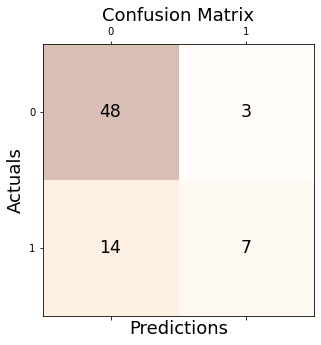

In [55]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


It seems like 48 of the results were 0 (away team not winning). This makes sense because a draw is the most common result in football. We need to focus on the predictions that actually help us decide if an away team will win (7)  